# Libraries

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Question 1

In [ ]:
df = pd.read_csv("data.csv")
india = gpd.read_file("https://github.com/deldersveld/topojson/raw/master/countries/india/india-states.json")

In [ ]:
df

,Capital,Latitude,Longitude,Population
0,Amaravati,16.5062,80.6480,442631
1,Itanagar,27.1004,93.6184,103758
2,Dispur,26.1445,91.7362,109079
3,Patna,25.5941,85.1376,2123191
4,Raipur,21.2514,81.6296,2118667
5,Panaji,15.4909,73.8278,113166
6,Gandhinagar,23.2156,72.6369,120197
7,Chandigarh,30.7333,76.7794,1054686
8,Shimla,31.1048,77.1734,176309
9,Ranchi,23.3441,85.3096,1466766


In [ ]:
capitals_df = gpd.GeoDataFrame({"City": df['Capital'], "Longitude": df['Longitude'], "Latitude": df['Latitude'], "Population": df['Population']})

In [ ]:
print(capitals_df)

In [ ]:
capitals_df['geometry'] = capitals_df.apply(lambda x: Point(x[1], x[2]), axis=1)

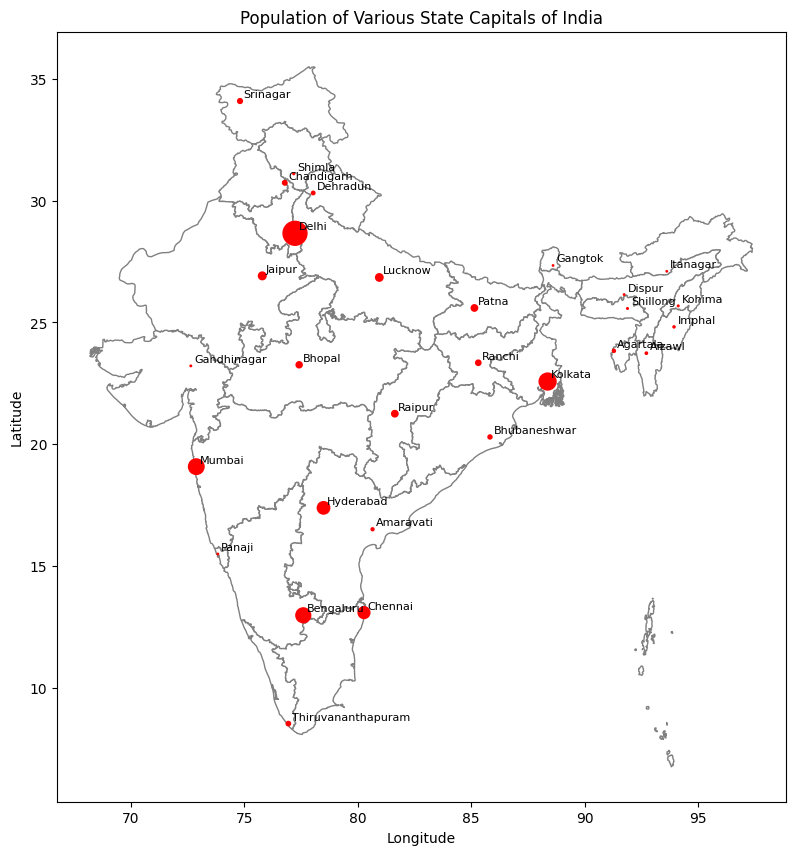

In [ ]:
capitals_df.crs = {'init': 'epsg:4326'}
india.crs = {'init': 'epsg:4326'}

fig, ax = plt.subplots(figsize=(10,10))
india.plot(ax=ax, color='white', edgecolor='gray')
# for i, row in capitals_df.iterrows():
#     ax.annotate(row['City'], xy=(row.geometry.x, row.geometry.y), 
#                 xytext=(row.geometry.x + 0.15, row.geometry.y + 0.15),
#                 fontsize=8,
#                 arrowprops=dict(facecolor='black', shrink=0.05))
#     ax.scatter(row.geometry.x, row.geometry.y, s=row['Population'])

for i, row in capitals_df.iterrows():
    ax.annotate(row['City'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(row.geometry.x + 0.15, row.geometry.y + 0.15),
                fontsize=8)
    # ax.scatter(row.geometry.x, row.geometry.y, s=row['Population'], color='red')


# fig, ax = plt.subplots(figsize=(20,10))
# india.plot(ax=ax, color='white', edgecolor='gray')
capitals_df.plot(ax=ax, marker='o', color='red', markersize=capitals_df['Population']/100000)

plt.title("Population of Various State Capitals of India")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



# 2. Draw the connection graph of Go Air domestic flights of India from the database https://www.flygofirst.com/umbraco/surface/Schedule/Flightscheduledata

In [ ]:
df2 = pd.read_csv("/content/Flightschedule.csv")
df2

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing
0,Abu Dhabi,Ahmedabad,G8 76,21:40,07:35,08:25,Via DEL
1,Abu Dhabi,Ahmedabad,G8 76,21:40,18:15,19:05,Via DEL
2,Abu Dhabi,Bagdogra,G8 76,21:40,14:25,15:15,Via DEL
3,Abu Dhabi,Bagdogra,G8 76,21:40,08:25,09:15,Via DEL
4,Abu Dhabi,Bangkok,G8 76,21:40,13:00,12:20,Via DEL
...,...,...,...,...,...,...,...
2532,Varanasi,Pune,G8 404,12:30,17:55,05:25,Via BLR
2533,Varanasi,Pune,G8 768,21:00,06:15,09:15,Via AMD
2534,Varanasi,Ranchi,G8 382,11:15,19:25,08:10,Via BOM
2535,Varanasi,Srinagar,G8 183,18:40,08:25,13:45,Via DEL


In [ ]:
a=df2["Destination"].unique()           ## To get the list of cities
a.sort()
print(a)


['Abu Dhabi' 'Ahmedabad' 'Amritsar' 'Bagdogra' 'Bangkok' 'Bengaluru'
 'Chandigarh' 'Chennai' 'Dammam' 'Dehra Dun' 'Delhi' 'Dubai' 'Goa'
 'Goa-New Goa' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jammu' 'Kannur' 'Kochi'
 'Kolkata' 'Kuwait' 'Leh' 'Lucknow' 'Male' 'Mumbai' 'Muscat' 'Nagpur'
 'Patna' 'Phuket' 'Port Blair' 'Pune' 'Ranchi' 'Srinagar' 'Thoise'
 'Varanasi']


In [ ]:
from geopy.geocoders import Nominatim  # Library for getting longitutes and latitudes
geolocator = Nominatim(user_agent="geoapiExercises")

city_locations={}

for i in a:    
    location = geolocator.geocode(i)
    city_locations.update({i:[location.latitude, location.longitude]})   # all the cities which are of our use, we get the location for them

print(city_locations)

{'Abu Dhabi': [24.4538352, 54.3774014], 'Ahmedabad': [23.0216238, 72.5797068], 'Amritsar': [31.6343083, 74.8736788], 'Bagdogra': [26.6988847, 88.3200303], 'Bangkok': [13.7524938, 100.4935089], 'Bengaluru': [12.9767936, 77.590082], 'Chandigarh': [30.72984395, 76.78414567016054], 'Chennai': [13.0836939, 80.270186], 'Dammam': [26.4367824, 50.1039991], 'Dehra Dun': [30.3255646, 78.0436813], 'Delhi': [28.6517178, 77.2219388], 'Dubai': [25.074282349999997, 55.18853865430702], 'Goa': [15.3004543, 74.0855134], 'Goa-New Goa': [15.5937836, 73.8126805], 'Guwahati': [26.1805978, 91.753943], 'Hyderabad': [17.38878595, 78.46106473453146], 'Jaipur': [26.9154576, 75.8189817], 'Jammu': [32.7185614, 74.8580917], 'Kannur': [11.8763836, 75.3737973], 'Kochi': [9.9674277, 76.2454436], 'Kolkata': [22.5726723, 88.3638815], 'Kuwait': [29.2733964, 47.4979476], 'Leh': [34.1642029, 77.5848133], 'Lucknow': [26.8381, 80.9346001], 'Male': [4.1779879, 73.5107387], 'Mumbai': [19.0785451, 72.878176], 'Muscat': [23.6151

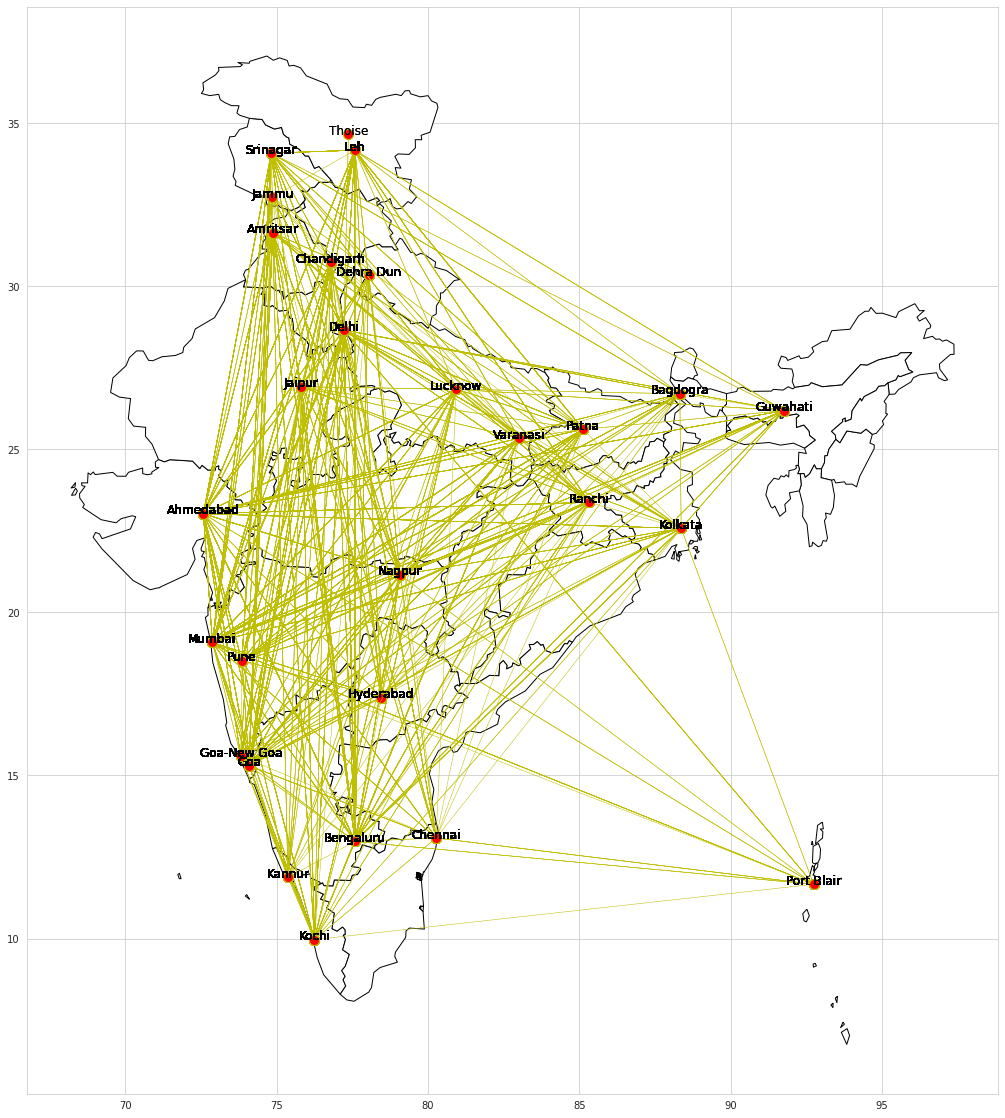

In [ ]:
map_df.plot(figsize=(20,20),color='w',edgecolor='k')

for i in range(len(df2)):

    lat1, lon1 = city_locations[df2["Origin"][i]][0], city_locations[df2["Origin"][i]][1]
    lat2, lon2 = city_locations[df2["Destination"][i]][0], city_locations[df2["Destination"][i]][1]

    if (8<lat1<38 and 8<lat2<38 and 68<lon1<98 and 68<lon2<98) :   # Putting the condition for indian cities only

      plt.plot([lon1, lon2], [lat1, lat2], linewidth=0.5, color="y", marker='o',markerfacecolor='r',markersize=10)  # draw the line between two cities

      plt.text(lon1, lat1, df2["Origin"][i], color="black", fontsize=12, horizontalalignment="center") 
      plt.text(lon2, lat2, df2["Destination"][i], color="black", fontsize=12, horizontalalignment="center") 

    # print(i)


# bord.plot(ax=ax,facecolor='silver', edgecolor='grey')
# plt.show()

plt.show()

When taking only non stop flights

In [ ]:
df3 = df2[df2["Routing"]=="Non Stop"].reset_index()
df3

,index,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing
0,6,Abu Dhabi,Delhi,G8 76,21:40,02:40,03:30,Non Stop
1,11,Abu Dhabi,Kannur,G8 54,22:20,03:40,03:50,Non Stop
2,12,Abu Dhabi,Kochi,G8 64,23:30,05:00,04:00,Non Stop
3,64,Ahmedabad,Bengaluru,G8 802,09:25,11:25,02:00,Non Stop
4,81,Ahmedabad,Bengaluru,G8 804,21:10,23:25,02:15,Non Stop
...,...,...,...,...,...,...,...,...
321,2481,Varanasi,Bengaluru,G8 404,12:30,14:45,02:15,Non Stop
322,2482,Varanasi,Bengaluru,G8 404,12:30,14:45,02:15,Non Stop
323,2485,Varanasi,Delhi,G8 183,18:40,20:05,01:25,Non Stop
324,2516,Varanasi,Mumbai,G8 350,13:50,16:10,02:20,Non Stop


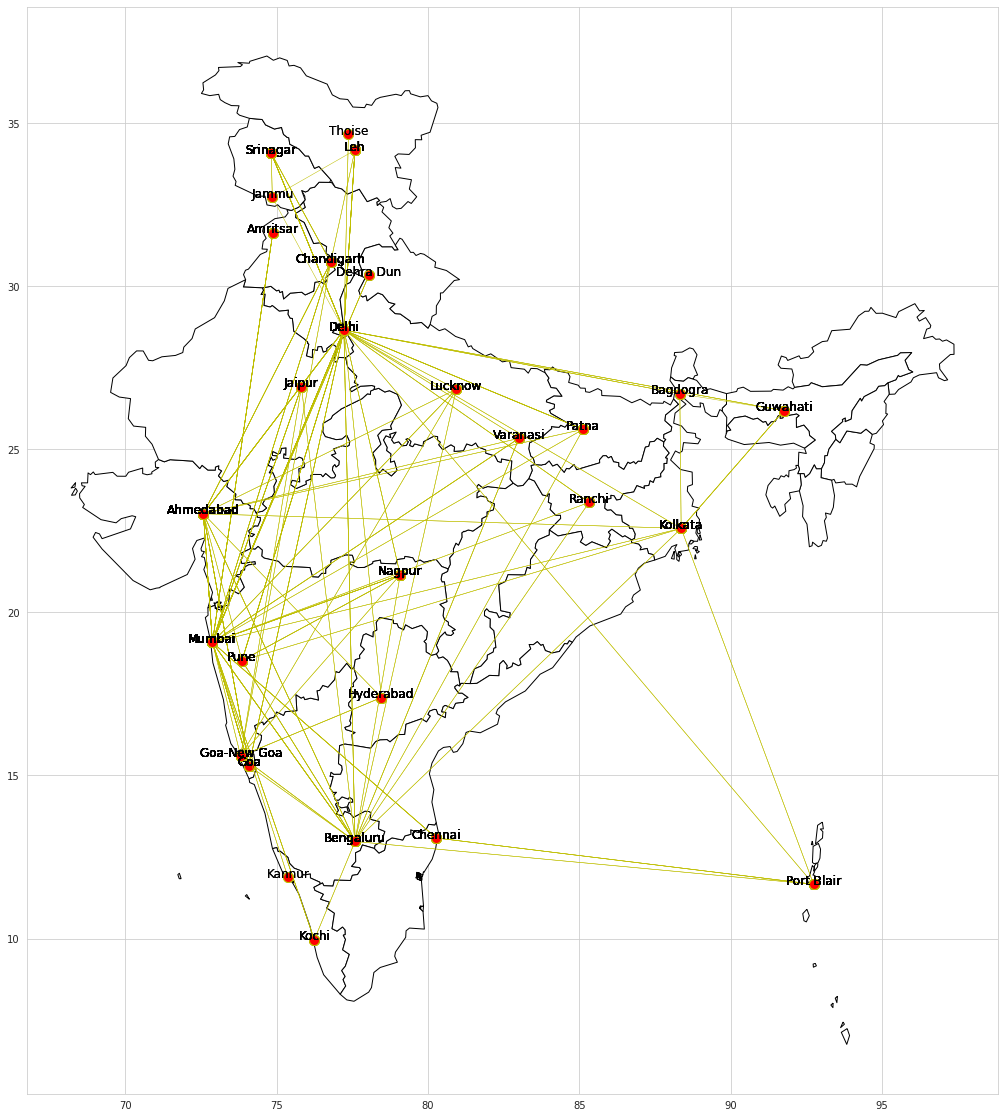

In [ ]:
map_df.plot(figsize=(20,20),color='w',edgecolor='k')

for i in range(len(df3)):

    lat1, lon1 = city_locations[df3["Origin"][i]][0], city_locations[df3["Origin"][i]][1]
    lat2, lon2 = city_locations[df3["Destination"][i]][0], city_locations[df3["Destination"][i]][1]

    if (8<lat1<38 and 8<lat2<38 and 68<lon1<98 and 68<lon2<98) :

      plt.plot([lon1, lon2], [lat1, lat2], linewidth=0.5, color="y", marker='o',markerfacecolor='r',markersize=10)

      plt.text(lon1, lat1, df3["Origin"][i], color="black", fontsize=12, horizontalalignment="center") 
      plt.text(lon2, lat2, df3["Destination"][i], color="black", fontsize=12, horizontalalignment="center") 

    # print(i)


# bord.plot(ax=ax,facecolor='silver', edgecolor='grey')
# plt.show()

plt.show()